In [39]:
from Backtest import Backtest,Position,Bid
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# Bid Class Demo
## intialize a Bid instance with four variables
- ticker
- shares
- price
- bid_type (1 as buy, 0 as sell)


In [40]:
# a bid to buy 100 shares of Apple at $163.43
buy_apple_100 = Bid(ticker = "AAPL", shares = 100, price = 163.43, bid_type = 1)

#the show method could be used for debugging
buy_apple_100.show()

Buying:
Ticker: AAPL
Shares: 100
Price: 163.43


# 

# Position class demo
## intialize a Position  instance with a bid instance

In [41]:
apple_position = Position(buy_apple_100)
apple_position.show()

Ticker: AAPL
Shares_held: 100
Latest_price: 163.43
weighted_average_cost: 163.43
----------------
Purchasing History
Price	Shares
163.43	100


## Change the position with another bid

In [42]:
buy_apple_50 = Bid(ticker = "AAPL", shares = 50, price = 163.13, bid_type = 1)
apple_position.change_position(buy_apple_50)
apple_position.show()

Ticker: AAPL
Shares_held: 150
Latest_price: 163.13
weighted_average_cost: 163.33
----------------
Purchasing History
Price	Shares
163.43	100
163.13	50


## Selling a stock

In [53]:
sell_apple_70 = Bid(ticker = 'AAPL', shares = 70, price = 165.24, bid_type = 0)

#if selling a stock, the change_position method will return a cost
#this cost will be the lowest part of costs in purchasing history 
cost_of_buying_70 = apple_position.change_position(sell_apple_70)
apple_position.show()

Ticker: AAPL
Shares_held: 10
Latest_price: 165.24
weighted_average_cost: 163.43
----------------
Purchasing History
Price	Shares
163.43	10


In [54]:
income = sell_apple_70.shares * sell_apple_70.price
print("Income: ", income)
print("Cost: ", cost_of_buying_70)
print("Pnl for this single trade: ", income - cost_of_buying_70 )

Income:  11566.800000000001
Cost:  11440.1
Pnl for this single trade:  126.70000000000073


# 

# Load sample data

In [55]:
data = pd.read_csv("test_data.csv",index_col=[0])
data.index = pd.to_datetime(data.index)
data.head(5)

,cat,mcd,etsy,twtr,kmi,gme,celg,wdc,ups,nflx,...,ms,abt,jpm,lb,rad,bbby,nvda,biib,aal,vz
2019-04-05 09:30:00,133.561,182.697,68.54,34.6301,17.8967,9.9000,94.2100,49.8244,107.836,369.111,...,42.9067,76.4354,99.8698,26.1864,11.196,17.0190,189.751,236.020,33.7574,54.2369
2019-04-05 09:31:00,133.400,182.908,68.49,34.5500,17.9057,9.8900,94.2500,49.8920,107.873,367.880,...,42.8782,76.4257,99.9170,26.2429,11.168,16.8594,189.492,235.786,33.8956,54.1446
2019-04-05 09:32:00,133.726,182.678,68.59,34.5170,17.9282,9.9000,94.3162,49.9269,108.143,367.810,...,43.0824,76.2125,100.1200,26.2476,11.060,16.8125,189.553,236.353,33.8956,54.1597
2019-04-05 09:33:00,133.554,182.448,68.51,34.5000,17.8966,9.9900,94.3700,50.1188,107.940,367.539,...,42.9162,76.0866,99.7659,26.2523,11.020,16.8219,189.144,236.300,33.8614,54.2921
2019-04-05 09:34:00,133.058,182.533,68.50,34.6700,17.8743,9.9501,94.3600,50.1332,107.874,368.050,...,42.9162,75.9897,99.8131,26.2900,11.018,16.6811,189.518,236.010,33.7678,54.2369


# A demo strategy
## Randomly buy 10 stocks at 9:30 everyday and sell at 16:00
## a strategy function has four parameters, which are:
- ti: current datetime 
- df: all historical data up to ti
- positions: a dictionary of all current positions (k: string of ticker, v: an instance of this ticker's Position)
- cash: cash avaliable

## and it should return a list of Bid instances

In [60]:
def my_strategy(ti,df,positions,cash):
    
    if ti.minute == 0 or ti.minute == 30:
        print("================={}=================".format(ti))
    bid_list = []
    
    #buy
    if ti.hour == 9 and ti.minute == 30:
        for i in range(10):
            ticker = random.choice(df.columns)
            bid = Bid(ticker = ticker, shares = 100, price = df.iloc[-1][ticker],bid_type = 1)
            bid_list.append(bid)
            bid.show()
        return bid_list
    
    #sell
    if ti.hour == 16 and ti.minute == 0:
        #for all current positions
        for pos in positions.values():
            bid = Bid(ticker = pos.ticker,shares = pos.shares,price = df.iloc[-1][pos.ticker],bid_type = 0)
            bid_list.append(bid)
            bid.show()
        return bid_list
    return bid_list

# Backtest Demo
## initialize a Backtest instance with data and strategy, in default:
- initial_amount = 100000
- has_tc = True (0.2% of transaction cost)

In [72]:
random_strat = Backtest(data.dropna(axis = 0),my_strategy)

In [73]:
random_strat.backtest()

=================2019-04-05 09:30:00=================
Buying:
Ticker: fb
Shares: 100
Price: 176.69
Buying:
Ticker: gild
Shares: 100
Price: 62.745
Buying:
Ticker: gm
Shares: 100
Price: 37.1701
Buying:
Ticker: mgm
Shares: 100
Price: 26.775
Buying:
Ticker: mchp
Shares: 100
Price: 89.3943
Buying:
Ticker: mu
Shares: 100
Price: 43.42
Buying:
Ticker: cvs
Shares: 100
Price: 50.7284
Buying:
Ticker: crm
Shares: 100
Price: 159.44
Buying:
Ticker: kss
Shares: 100
Price: 68.5011
Buying:
Ticker: cmg
Shares: 100
Price: 703.325
Not enough cash to build a position for cmg
=================2019-04-05 10:00:00=================
=================2019-04-05 10:30:00=================
=================2019-04-05 11:00:00=================
=================2019-04-05 11:30:00=================
=================2019-04-05 12:00:00=================
=================2019-04-05 12:30:00=================
=================2019-04-05 13:00:00=================
=================2019-04-05 13:30:00=================
=======

=================2019-04-17 10:30:00=================
=================2019-04-17 11:00:00=================
=================2019-04-17 11:30:00=================
=================2019-04-17 12:00:00=================
=================2019-04-17 12:30:00=================
=================2019-04-17 13:00:00=================
=================2019-04-17 13:30:00=================
=================2019-04-17 14:00:00=================
=================2019-04-17 14:30:00=================
=================2019-04-17 15:00:00=================
=================2019-04-17 15:30:00=================
=================2019-04-17 16:00:00=================
Selling
Ticker: f
Shares: 200
Price: 8.9215
Selling
Ticker: mat
Shares: 100
Price: 13.06
Selling
Ticker: x
Shares: 100
Price: 16.3983
Selling
Ticker: kmi
Shares: 100
Price: 17.699
Selling
Ticker: lly
Shares: 100
Price: 112.246
Selling
Ticker: lb
Shares: 100
Price: 24.217
Selling
Ticker: etsy
Shares: 100
Price: 64.25
Selling
Ticker: bsx
Shares: 100
Pr

=================2019-04-18 10:00:00=================
=================2019-04-18 10:30:00=================
=================2019-04-18 11:00:00=================
=================2019-04-18 11:30:00=================
=================2019-04-18 12:00:00=================
=================2019-04-18 12:30:00=================
=================2019-04-18 13:00:00=================
=================2019-04-18 13:30:00=================
=================2019-04-18 14:00:00=================
=================2019-04-18 14:30:00=================
=================2019-04-18 15:00:00=================
=================2019-04-18 15:30:00=================
=================2019-04-18 16:00:00=================
Selling
Ticker: s
Shares: 100
Price: 5.78
Selling
Ticker: gm
Shares: 100
Price: 38.5872
Selling
Ticker: ea
Shares: 100
Price: 93.0162
Selling
Ticker: abt
Shares: 100
Price: 71.9222
Selling
Ticker: txn
Shares: 100
Price: 109.983
Selling
Ticker: swks
Shares: 100
Price: 87.2787
Selling
Ticker: bbby
S

=================2019-04-22 10:00:00=================
=================2019-04-22 10:30:00=================
=================2019-04-22 11:00:00=================
=================2019-04-22 11:30:00=================
=================2019-04-22 12:00:00=================
=================2019-04-22 12:30:00=================
=================2019-04-22 13:00:00=================
=================2019-04-22 13:30:00=================
=================2019-04-22 14:00:00=================
=================2019-04-22 14:30:00=================
=================2019-04-22 15:00:00=================
=================2019-04-22 15:30:00=================
=================2019-04-22 16:00:00=================
Selling
Ticker: jnj
Shares: 100
Price: 131.408
Selling
Ticker: msft
Shares: 100
Price: 121.095
Selling
Ticker: ma
Shares: 100
Price: 240.946
Selling
Ticker: gis
Shares: 100
Price: 48.6765
Selling
Ticker: adbe
Shares: 100
Price: 272.21
Selling
Ticker: khc
Shares: 100
Price: 29.8597
Selling
Ticker: 

=================2019-04-23 11:00:00=================
=================2019-04-23 11:30:00=================
=================2019-04-23 12:00:00=================
=================2019-04-23 12:30:00=================
=================2019-04-23 13:00:00=================
=================2019-04-23 13:30:00=================
=================2019-04-23 14:00:00=================
=================2019-04-23 14:30:00=================
=================2019-04-23 15:00:00=================
=================2019-04-23 15:30:00=================
=================2019-04-23 16:00:00=================
Selling
Ticker: csx
Shares: 100
Price: 77.1841
Selling
Ticker: ibm
Shares: 100
Price: 128.733
Selling
Ticker: wdc
Shares: 100
Price: 52.2541
Selling
Ticker: unp
Shares: 100
Price: 170.134
Selling
Ticker: cop
Shares: 100
Price: 62.7714
Selling
Ticker: mro
Shares: 100
Price: 18.2795
Selling
Ticker: pcg
Shares: 100
Price: 21.46
Selling
Ticker: lrcx
Shares: 100
Price: 188.751
Selling
Ticker: nem
Shares: 100

# After backtest, check all historical transactions with transaction_history, a dataframe that recorded each bid, its transaction cost and pnl.

In [74]:
random_strat.transaction_history

,dt,ticker,type,price,shares,amount,cash_left,transaction_cost,pnl
0,2019-04-05 09:30:00,fb,1,176.6900,100,17669.00,82295.66200,35.33800,0.00
1,2019-04-05 09:30:00,gild,1,62.7450,100,6274.50,76008.61300,12.54900,0.00
2,2019-04-05 09:30:00,gm,1,37.1701,100,3717.01,72284.16898,7.43402,0.00
3,2019-04-05 09:30:00,mgm,1,26.7750,100,2677.50,69601.31398,5.35500,0.00
4,2019-04-05 09:30:00,mchp,1,89.3943,100,8939.43,60644.00512,17.87886,0.00
...,...,...,...,...,...,...,...,...,...
353,2019-04-23 16:00:00,cop,0,62.7714,100,6277.14,73142.60596,12.55428,-57.62
354,2019-04-23 16:00:00,mro,0,18.2795,100,1827.95,74966.90006,3.65590,-12.72
355,2019-04-23 16:00:00,pcg,0,21.4600,100,2146.00,77108.60806,4.29200,-3.41
356,2019-04-23 16:00:00,lrcx,0,188.7510,100,18875.10,95945.95786,37.75020,-3.40


In [75]:
print("Total Transaction cost:", random_strat.transaction_history['transaction_cost'].sum())

Total Transaction cost: 6711.27744


<AxesSubplot:>

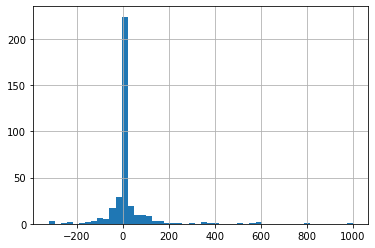

In [76]:
#histogram of pnl
random_strat.transaction_history['pnl'].hist(bins = 50)

# The portfolio_tracker records the # of bids, length of positions,cash value, position value, total value at each ti. 
# The bah column is the value assuming we buy all the tickers when it begins

In [77]:
random_strat.portfolio_tracker

,dt,bid_count,position_count,cash_value,positions_value,total_value,bah
0,2019-04-05 09:30:00,10,9,28370.63722,71486.39,99857.02722,99856.000000
1,2019-04-05 09:31:00,0,9,28370.63722,71450.72,99821.35722,99866.790832
2,2019-04-05 09:32:00,0,9,28370.63722,71464.96,99835.59722,99926.823833
3,2019-04-05 09:33:00,0,9,28370.63722,71333.14,99703.77722,99827.385857
4,2019-04-05 09:34:00,0,9,28370.63722,71407.43,99778.06722,99788.805765
...,...,...,...,...,...,...,...
8836,2019-04-23 16:26:00,0,0,99052.38256,0.00,99052.38256,100606.956988
8837,2019-04-23 16:27:00,0,0,99052.38256,0.00,99052.38256,100578.631615
8838,2019-04-23 16:28:00,0,0,99052.38256,0.00,99052.38256,100571.295174
8839,2019-04-23 16:29:00,0,0,99052.38256,0.00,99052.38256,100562.975929


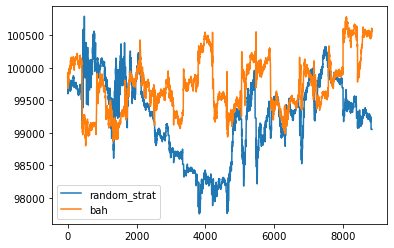

In [82]:
plt.plot(random_strat.portfolio_tracker['total_value'], label = 'random_strat')
plt.plot(random_strat.portfolio_tracker['bah'],label = 'bah')
plt.legend()

# 

# Upload to dashboard
## the upload_to_dashboard method will upload this graph to dashboard.
## make sure the crediential file "algo-trade-dashboard-80cae071e907.json" is under current directory, also install the related packages in requirements.txt

## to upload, call the function with the strategy name, if the name already exist in the cloud, the graph will be overwrite

In [83]:
random_strat.upload_to_dashboard("random_demo_0912")

Data uploaded.


# Check on dashboard:
https://tigaji-algo-trade-dashboard-dashboard-gv8r0a.streamlitapp.com/